In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
from nltk.tokenize import sent_tokenize

para = "Hello everyone. It's good to see you. Let's start our text mining class!"
print(sent_tokenize(para))

['Hello everyone.', "It's good to see you.", "Let's start our text mining class!"]


In [4]:
from nltk.tokenize import word_tokenize

print(word_tokenize(para))

['Hello', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'text', 'mining', 'class', '!']


In [5]:
import re
# 둘째 인수인 문자열에서 a,b,c 중 하나라도 일치하는 문자를 가져옴
re.findall("[abc]", "How are you, boy?")

['a', 'b']

In [6]:
# 숫자를 검색
re.findall("[0123456789]", "3a7b5c9d")

['3', '7', '5', '9']

In [7]:
from nltk.tokenize import RegexpTokenizer

text1 = "Sorry, I can't go there."
# 문자, 숫자, 언더바(_), 아포스트로피('')로 이루어진 3자 이상의 단어로 토크나이즈
tokenizer = RegexpTokenizer("[\w']{3,}")
print(tokenizer.tokenize(text1.lower()))        # 소분자로 바꾸고 정규식 적용

['sorry', "can't", 'there']


## 노이즈와 불용어 제거

In [8]:
from nltk.corpus import stopwords     # NLTK 제공 불용어 사전
# 영어 불용어만 가져와서 set을 이용해 중복을 제거

english_stops = set(stopwords.words('english'))
text1 = "Sorry, I couldn't go to movie yesterday."
tokens = word_tokenize(text1.lower())
# stopwords를 제외한 단어들만으로 list를 생성
tokens = [word for word in tokens if word not in english_stops]
print(tokens)
# 자신만의 불용어 사전 생성
my_stops = ['could', 'n\'t']
tokens = [word for word in tokens if word not in my_stops]
print(tokens)

['sorry', ',', 'could', "n't", 'go', 'movie', 'yesterday', '.']
['sorry', ',', 'go', 'movie', 'yesterday', '.']


## 어간 추출 (STEMMING)

### 포터 스테머
    - 마틴 포터가 작성한 스테밍 알고리즘으로 영어 분야에서 사실상의 표준임
    - 어간 추출은 사전을 사용하지 않고 규칙에 따라 어간을 추출함
    - 추출한 어간은 사전에 없는 단어가 될 수 있으나, 컴퓨터 입장에서는 중요하지 않음

In [9]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

cook cookeri cookbook


## 표제어 추출 (LEMMATIZATION)
    - 주어진 단어를 사전에 정의된 기본형으로 변환
    - 어간 추출과 달리 사전이 필요하며, 의미적 관점의 기본형을 찾는 작업
    - WordNetLemmatizer가 잘 알려져 있음

In [10]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('cooking'), lemmatizer.lemmatize('cooking', pos='v'))
print(lemmatizer.lemmatize('cookery'), lemmatizer.lemmatize('cookbooks'))

cooking cook
cookery cookbook


### nltk.pos_tag()
- 토큰화된 결과에 대해 품사를 태길해 (단어, 품사)로 구성된 튜플의 리스트로 품사 태깅 결과를 반환

In [11]:
import nltk
from nltk.tokenize import word_tokenize

tokens = word_tokenize("Hello everyone. It's good to see you. Let's start our text mining class!")
print(nltk.pos_tag(tokens))               # 토큰 리스트를 입력으로 받을 수 있음

[('Hello', 'NNP'), ('everyone', 'NN'), ('.', '.'), ('It', 'PRP'), ("'s", 'VBZ'), ('good', 'JJ'), ('to', 'TO'), ('see', 'VB'), ('you', 'PRP'), ('.', '.'), ('Let', 'VB'), ("'s", 'POS'), ('start', 'VB'), ('our', 'PRP$'), ('text', 'NN'), ('mining', 'NN'), ('class', 'NN'), ('!', '.')]


In [12]:
my_tag_set = ['NN', 'VB', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set]
print(my_words)

['everyone', 'good', 'see', 'Let', 'start', 'text', 'mining', 'class']


## 품사 태깅
- 단어에 품사 정보를 추가해 구분
    - 아래와 같이 join()을 이용해 단어와 품사를 결합함으로써, 단어에 대한 품사정보를 추가할 수 있음

In [13]:
words_with_tag = ['/'.join(item) for item in nltk.pos_tag(tokens)]
print(words_with_tag)

['Hello/NNP', 'everyone/NN', './.', 'It/PRP', "'s/VBZ", 'good/JJ', 'to/TO', 'see/VB', 'you/PRP', './.', 'Let/VB', "'s/POS", 'start/VB', 'our/PRP$', 'text/NN', 'mining/NN', 'class/NN', '!/.']


In [14]:
pip install JPype1-1.4.0-cp39-cp39-win_amd64.whl

Processing c:\users\user\bigdata2022\week6\jpype1-1.4.0-cp39-cp39-win_amd64.whl
JPype1 is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


## KoNLPy

In [16]:
# koNLPy에서 Okt(트위터) 형태소 분석기를 import
from konlpy.tag import Okt
t = Okt()

sentence = "절망의 반대가 희망은 아니다."
print(t.morphs(sentence))
print(t.nouns(sentence))
print(t.pos(sentence))

['절망', '의', '반대', '가', '희망', '은', '아니다', '.']
['절망', '반대', '희망']
[('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation')]


## 단어 빈도 분석 실습 자료

In [17]:
import nltk
nltk.download('gutenberg') # 다운로드
from nltk.corpus import gutenberg
file_names = gutenberg.fileids() # 제공하는 파일명을 읽어와서 출력
print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


### 토큰화 - Word_tokenize 이용
    - gutenberg.open().read()로 파일을 읽어 와서 문자열로 저장
    - len()으로 길이를 출력하면 문자의 수 확인 가능
    - 토큰화 이후 len()으로 결과를 출력하면 토큰(단어)의 수 확인 가능

In [18]:
from nltk.tokenize import word_tokenize
doc_alice = gutenberg.open('carroll-alice.txt').read()
print('Length of document:', len(doc_alice))
tokens_alice = word_tokenize(doc_alice) # word_tokenize()로 토큰화 실행
print('Num of tokens used:', len(tokens_alice))

Length of document: 144395
Num of tokens used: 33494


## 어간추출
### 포터 스테머를 이용한 어간 추출
- 토큰화 결과에 대해 list comprehension을 이용해 스테밍 실행
- 규칙을 이용해 변환하기 때문에 결과를 사람이 읽기에 좋지 않음
- 일반적으로 빈도 분석에서는 잘 활용하지 않는 편

In [19]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]
print(stem_tokens_alice[:10]) # 앞부터 10개의 어간추출 결과를 출력

['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865']


## 표제어 추출
- 토큰화 결과에 대해 WordNetLemmatrizer 실행
- 어간 추출에 비해 가독성이 좋은 결과를 제공

In [20]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]
print(lem_tokens_alice[:10]) # 앞부터 10개의 표제어추출 결과를 출력

['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865']


## 정규 표현식을 이용한 토큰화

In [21]:
from nltk.tokenize import RegexpTokenizer
# 세 문자 이상의 단어만 추출
tokenizer = RegexpTokenizer("[\w']{3,}")
# 소문자 변환 후 토큰화 실행
reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
# 토큰의 수와 앞 10개의 토큰을 출력해서 확인
print('Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print('Token sample:')
print(reg_tokens_alice[:10])

Num of tokens with RegexpTokenizer: 21616
Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit']


## 불용어 제거

In [22]:
from nltk.corpus import stopwords # 일반적으로 분석대상이 아닌 단어들 english_stops =
set(stopwords.words('english')) # 반복되지 않게 set으로 변환
# stopwords를 제외한 단어들만으로 리스트를 생성
result_alice = [word for word in reg_tokens_alice if word not in english_stops]
# 토큰의 수와 앞 10개의 토큰을 출력해서 확인
print('Num of tokens after stopword elimination:', len(result_alice))
print('Token sample:')
print(result_alice[:10])

Num of tokens after stopword elimination: 12999
Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice']


## 단어별 빈도 계산
### 딕셔너리를 이용해 단어별 빈도 계산
- 단어를 key로 하고 빈도를 value로 하는 딕셔너리를 생성
- 각 토큰에 대해 해당 단어의 빈도를 1씩 더해 줌

In [23]:
# 단어별 빈도를 담을 딕셔너리 생성
alice_word_count = dict()
for word in result_alice: # 모든 토큰에 대해
    # 단어가 아직 딕셔너리에 없으면 1을, 있으면 기존 값에 1을 더해서 저장
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

    # 빈도를 key로 하여 단어를 빈도 역순으로 정렬
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, \
reverse=True)

In [24]:
print("Top 20 high frequency words:")
for key in sorted_word_count[:20]: #빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

Top 20 high frequency words:
'said': 462, 'alice': 385, 'little': 128, 'one': 98, 'know': 88, 'like': 85, 'went': 83, 'would': 78, 'could': 77, 'thought': 74, 'time': 71, 'queen': 68, 'see': 67, 'king': 61, 'began': 58, 'turtle': 57, "'and": 56, 'way': 56, 'mock': 56, 'quite': 55, 

## 빈도 그래프 그리기

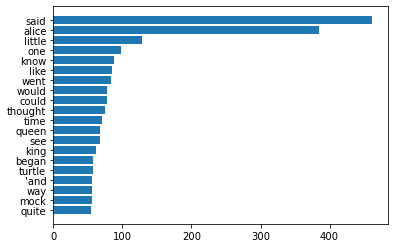

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
n = sorted_word_count[:20][::-1]
# 20개 단어에 대한 빈도
w = [alice_word_count[key] for key in n]
# 수평 막대그래프
plt.barh(range(len(n)),w,tick_label=n)
plt.show()

## 워드 클라우드

In [26]:
!pip install wordcloud

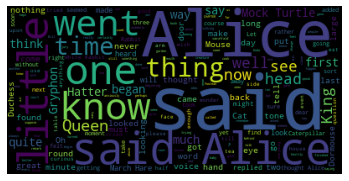

In [27]:
from wordcloud import WordCloud
# 워드 클라우드 이미지 생성
wordcloud = WordCloud()
wordcloud.generate(doc_alice)

plt.axis("off") # 축이 보이지 않게 설정
# plt.imshow()로 이미지 출력
plt.imshow(wordcloud)
plt.show()

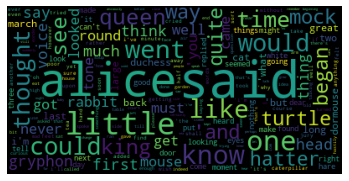

In [28]:
# 워드 클라우드 이미지 생성
wordcloud = WordCloud(max_font_size=60)
wordcloud.generate_from_frequencies(alice_word_count)

plt.axis("off") # 축이 보이지 않게 설정
# plt.imshow()로 이미지 출력
plt.imshow(wordcloud)
plt.show()

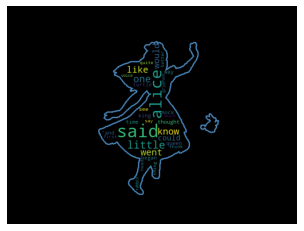

In [29]:
import numpy as np
from PIL import Image
# 사용할 배경 이미지를 불러와서 numpy array로 변환
alice_mask = np.array(Image.open("alice_mask.png"))
wc = WordCloud(background_color="black", # 배경색 지정
        max_words=30, # 출력할 최대 단어 수
        mask=alice_mask, # 배경으로 사용할 이미지
        contour_width=2, # 테두리 굵기
        contour_color='steelblue') # 테두리 색

wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성
wc.to_file("alice.png") # 필요한 경우 결과를 이미지 파일로 저장
plt.axis("off")
plt.imshow(wc)
plt.show()

## 한글 문서의 단어 빈도 그래프

In [30]:
from konlpy.corpus import kolaw
# NLTK와 유사한 방법으로 헌법 텍스트를 가져옴
const_doc = kolaw.open('constitution.txt').read()
print(type(const_doc)) # 가져온 데이터의 type을 확인 - 문자열
print(len(const_doc)) # 전체 문자 수 확인

<class 'str'>
18884


### KoNLPy를 이용한 전처리
- 주로 명사에 관심이 있으므로 명사만 추출하고 한 글자 단어는 제외

In [31]:
from konlpy.tag import Okt
t = Okt()
tokens_const = t.nouns(const_doc) # 형태소 단위로 토큰화 후 명사만 추출
# 한 글자로 된 토큰은 제외
tokens_const = [token for token in tokens_const if len(token) > 1]
print('토큰의 수:', len(tokens_const))
print('앞 10개의 토큰:')
print(tokens_const[:10])

토큰의 수: 3013
앞 10개의 토큰:
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']


## 한글 단어 빈도 그래프 생성

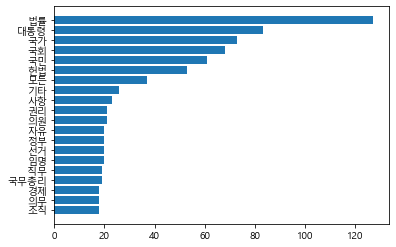

In [32]:
from matplotlib import font_manager, rc

# 그래프에서 사용할 한글 폰트를 지정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# 단어별 빈도를 담을 딕셔너리 생성하고, 빈도 계산
const_word_count = dict()
for word in tokens_const:
    const_word_count[word] = const_word_count.get(word, 0) + 1
    
# 빈도를 key로 하여 단어를 빈도 역순으로 정렬
sorted_word_count = sorted(const_word_count, key=const_word_count.get, reverse=True)
# plt.barh로 그래프 출력
n = sorted_word_count[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = [const_word_count[key] for key in n] # 20개 단어에 대한 빈도
plt.barh(range(len(n)),w,tick_label=n) # 수평 막대그래프
plt.show()

## 대한민국 헌법 워드 클라우드 생성

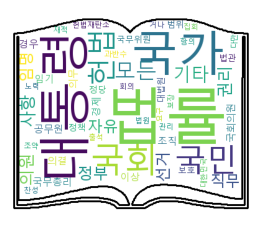

In [39]:
# WordCloud 객체에 전달할 폰트주소 생성
font_path = 'c:/Windows/Fonts/malgun.ttf'
book_mask = np.array(Image.open("book_mask.png"))
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100, # 최대 폰트 크기
    width = 800, # 이미지 너비
    height = 400, # 이미지 높이
    background_color='white', # 이미지 배경색
    contour_width=3,
    contour_color='black',
    mask=book_mask,
    max_words=50) # 최대 단어 수
    
# 원문이 아닌 형태소 분석 결과로부터 워드 클라우드 생성
wordcloud.generate_from_frequencies(const_word_count)
wordcloud.to_file("book_wc.png") # 생성한 이미지를 파일로 저장
plt.axis("off")
plt.imshow(wordcloud)
plt.show()